# Imports

In [3]:
import idx2numpy
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import numpy as np

# define helpers

## read files

In [4]:
def read_file(file):
    return idx2numpy.convert_from_file(file)

## show samples

In [5]:
def show_sample(tests, predicted):
    _, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))
    for ax, image, prediction in zip(axes, tests, predicted):
        ax.set_axis_off()
        image = image.reshape(28, 28)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title(f"Prediction: {prediction}")

    plt.show()

## display image from an array

In [6]:
def display_image_from_array(array):
    plt.imshow(array, interpolation='nearest')
    plt.show()

## generate a distibution histogram

In [7]:
def gen_distibution_histogram(values):
    plt.hist(values, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    plt.show()

## load assets

In [8]:
train_images = read_file("./assets/train-images.idx3-ubyte")
train_labels = read_file("./assets/train-labels.idx1-ubyte")
test_images = read_file("./assets/t10k-images.idx3-ubyte")
test_labels = read_file("./assets/t10k-labels.idx1-ubyte")

## confusion matrix

In [9]:
def confusion_matrix(test, predicted):
    disp = metrics.ConfusionMatrixDisplay.from_predictions(test, predicted)
    disp.figure_.suptitle("Confusion Matrix")
    plt.show()

## print first image

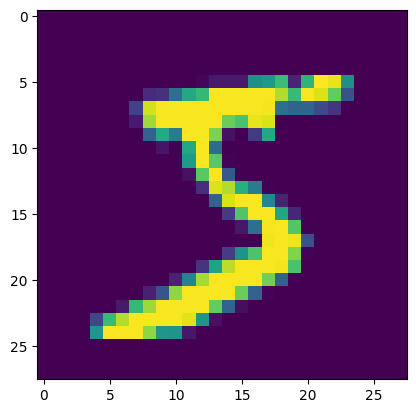

In [15]:
display_image_from_array(train_images[0])

## Show distribution

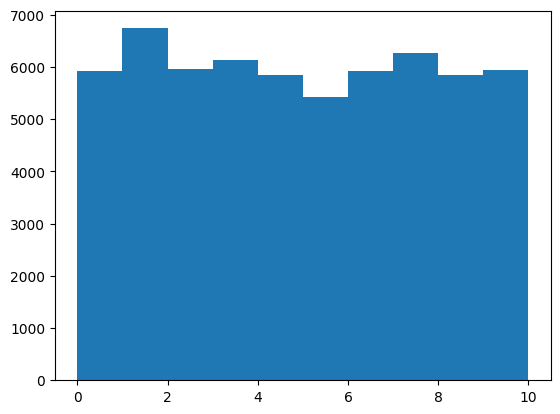

In [11]:
gen_distibution_histogram(train_labels)

## Apply Sklearn model

In [12]:
    x_train = train_images[:700]
    y_train = train_labels[:700]
    x_test = test_images[:500]
    y_test = test_labels[:500]

    n_samples = len(x_train)
    x_train = x_train.reshape((n_samples, -1))

    t_samples = len(x_test)
    x_test = x_test.reshape((t_samples, -1))

    print("Data reshaped")

    clf = svm.SVC()

    print("Classifier created")

    clf.fit(x_train, y_train)

    print("Learning complete")

    predicted = clf.predict(x_test)

    print("Prediction complete")

Data reshaped
Classifier created
Learning complete
Prediction complete


## Confusion matrix

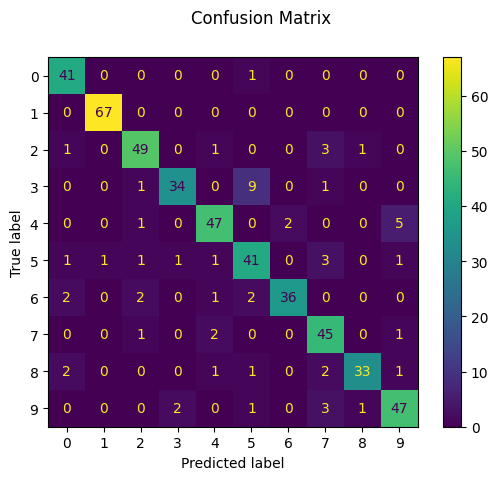

In [13]:
confusion_matrix(y_test, predicted)

## Sample result

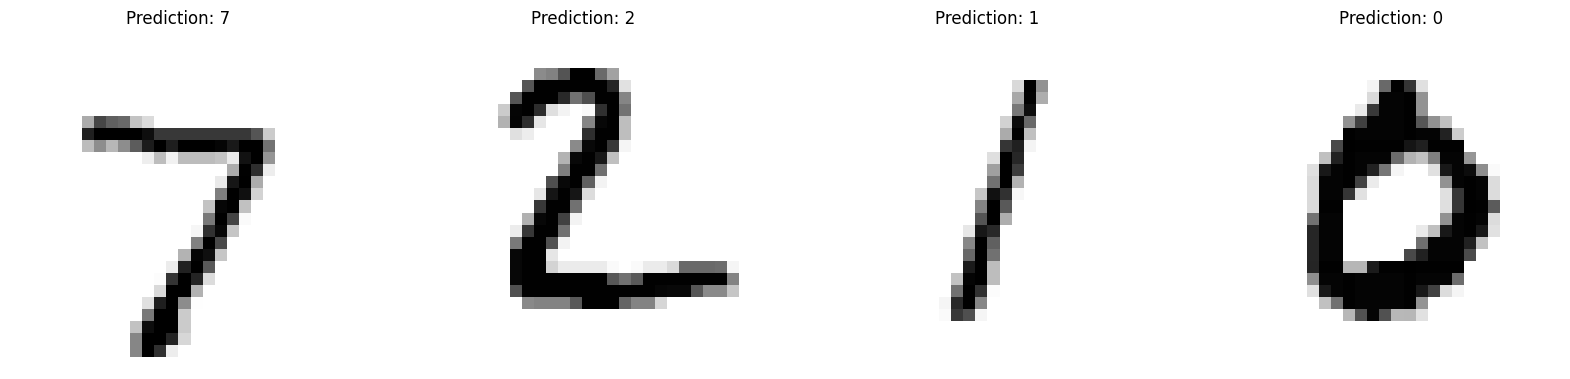

In [14]:
show_sample(x_test, predicted)